In [3]:
from ucimlrepo import fetch_ucirepo 
  
opticalrec = fetch_ucirepo(id=80) 
  
X = opticalrec.data.features 
y = opticalrec.data.targets 

print(opticalrec.metadata) 
  
print(opticalrec.variables) 


{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

In [4]:
X.head()
y.value_counts()

class
3        572
1        571
4        568
7        566
9        562
6        558
5        558
2        557
0        554
8        554
Name: count, dtype: int64

In [5]:
X.isnull().sum()

Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
              ..
Attribute60    0
Attribute61    0
Attribute62    0
Attribute63    0
Attribute64    0
Length: 64, dtype: int64

In [6]:
t = X.skew()
print(t)

Attribute1     0.000000
Attribute2     3.925258
Attribute3     0.516619
Attribute4    -1.241939
Attribute5    -1.079219
                 ...   
Attribute60   -1.302992
Attribute61   -1.160078
Attribute62    0.235481
Attribute63    2.095784
Attribute64    7.361326
Length: 64, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_9784\1903344806.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (4,4))


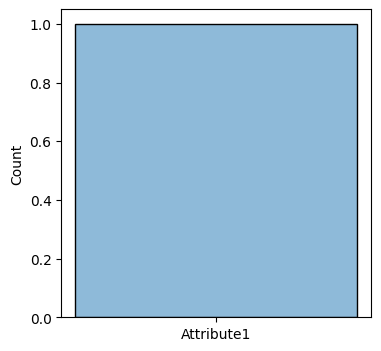

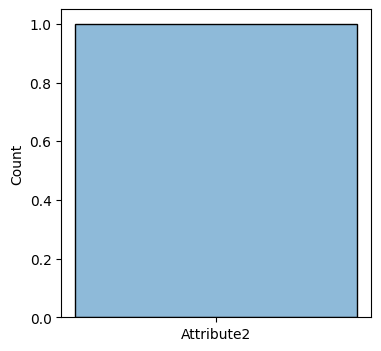

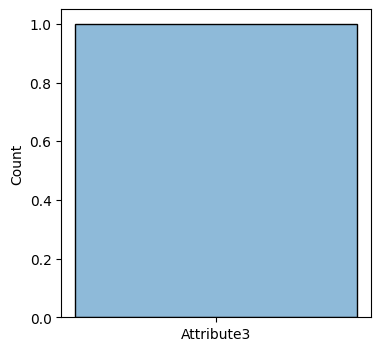

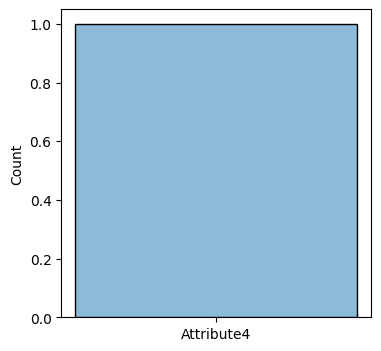

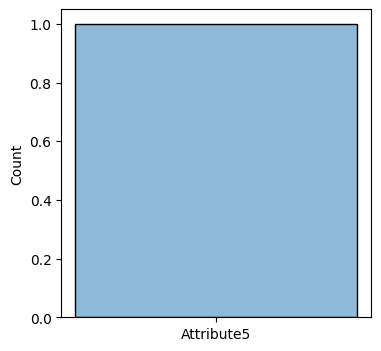

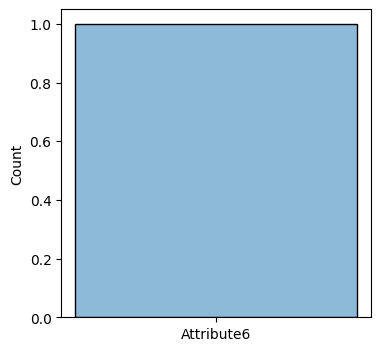

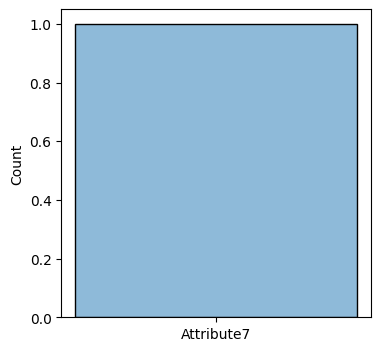

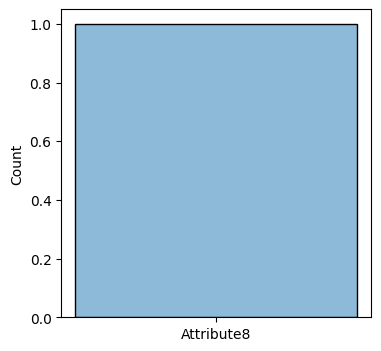

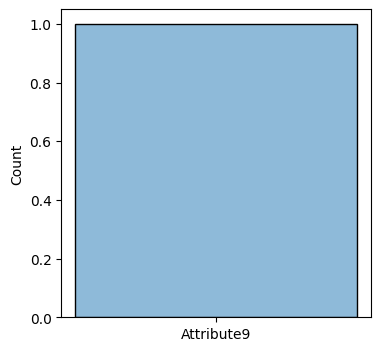

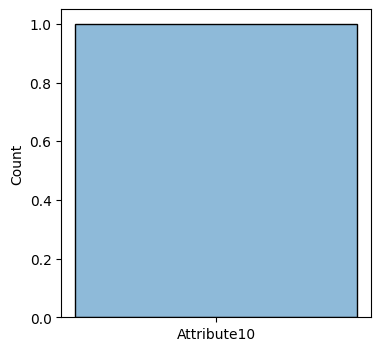

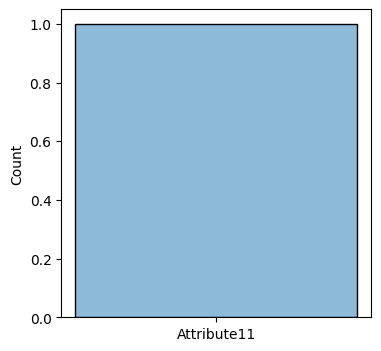

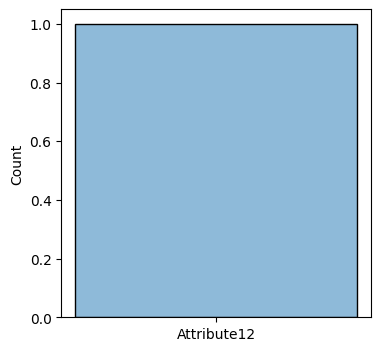

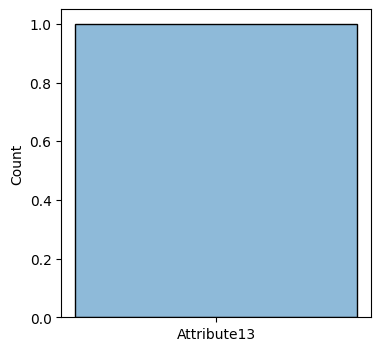

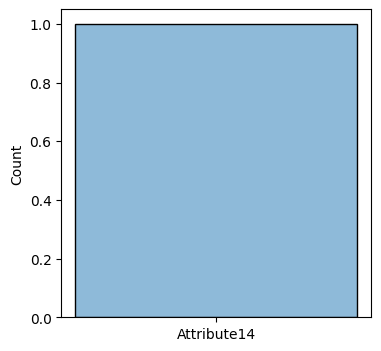

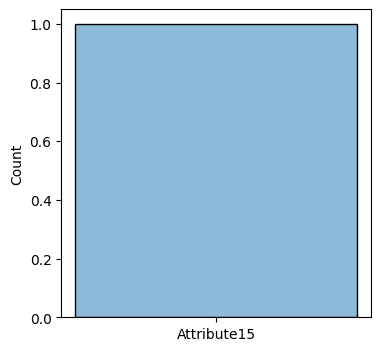

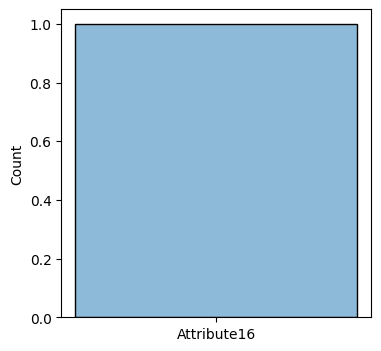

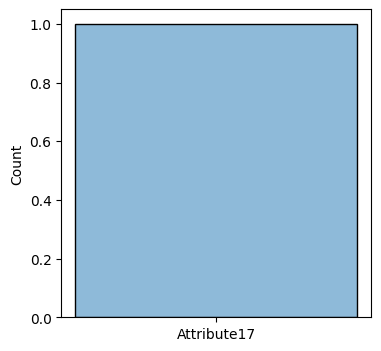

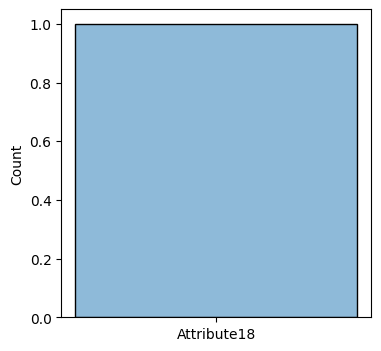

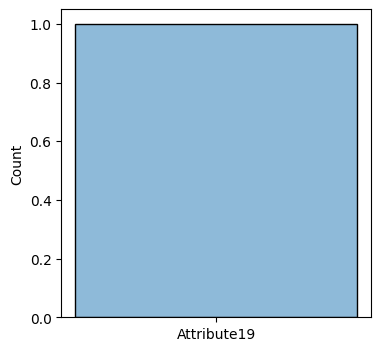

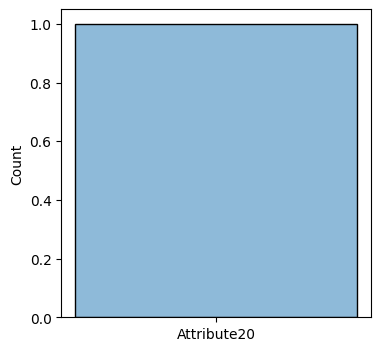

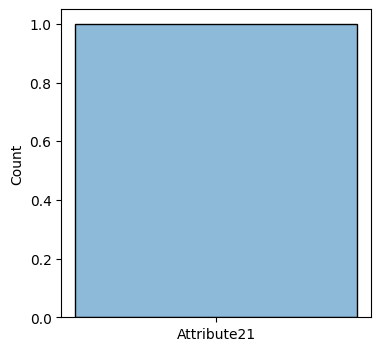

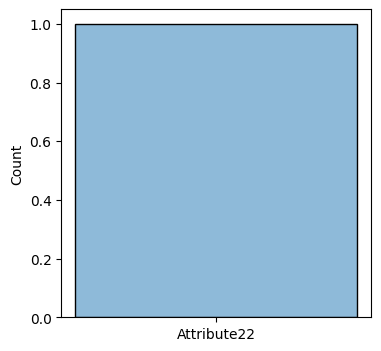

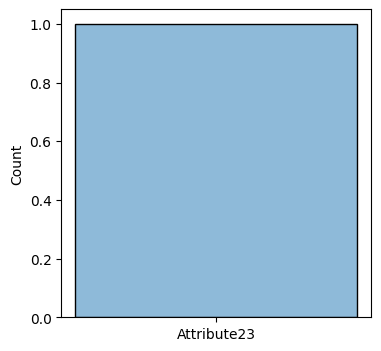

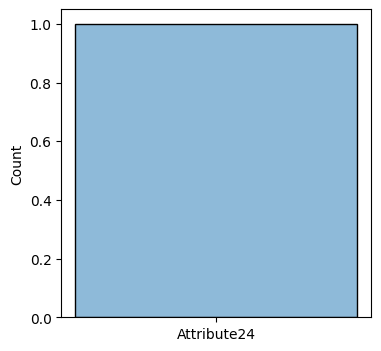

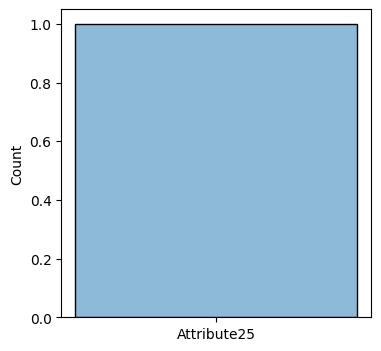

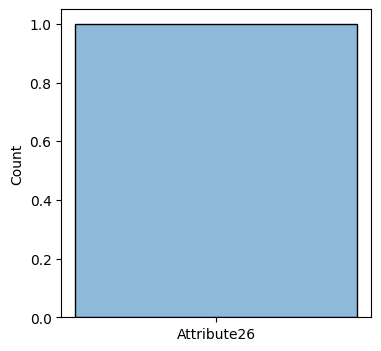

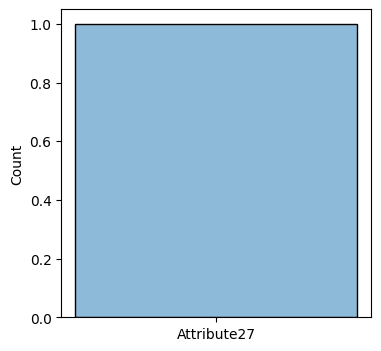

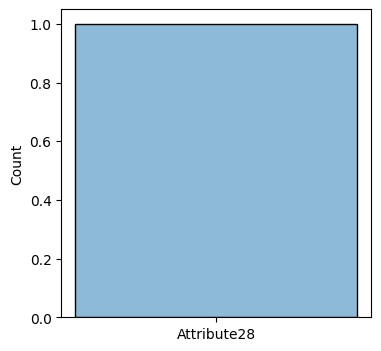

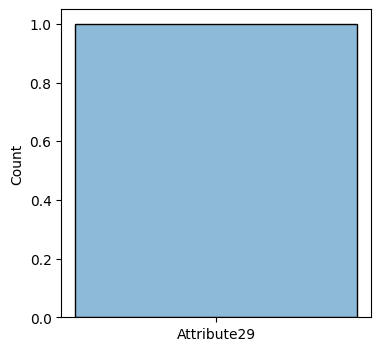

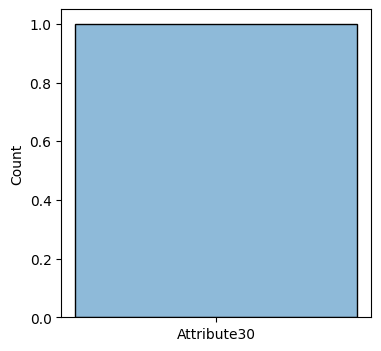

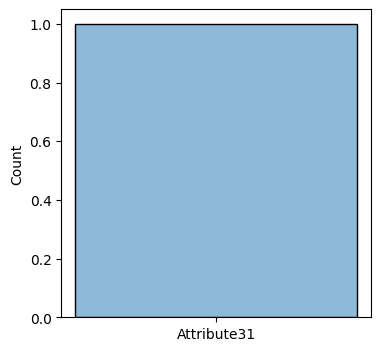

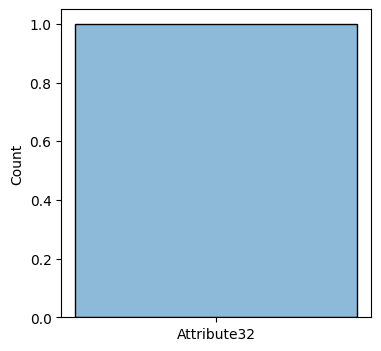

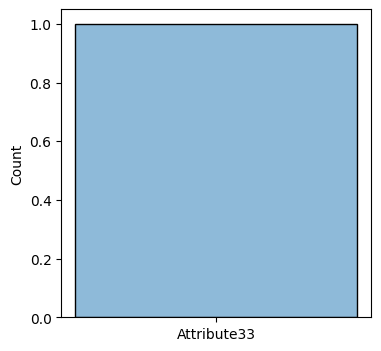

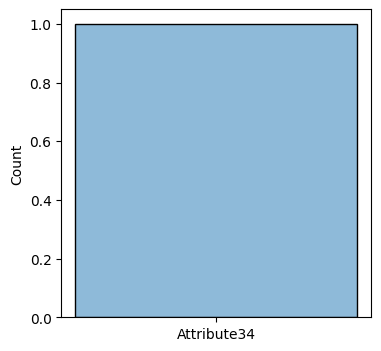

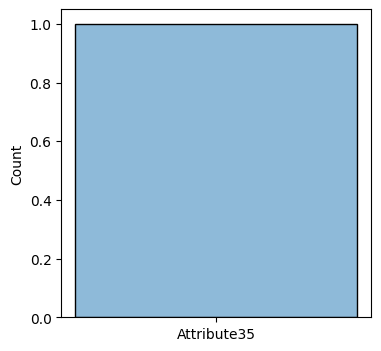

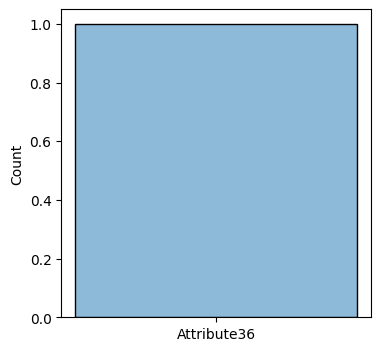

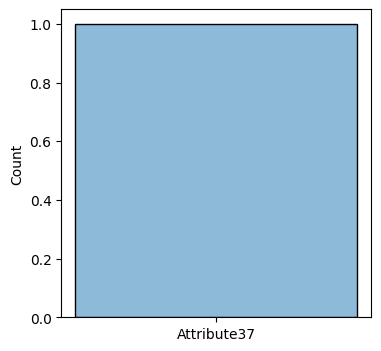

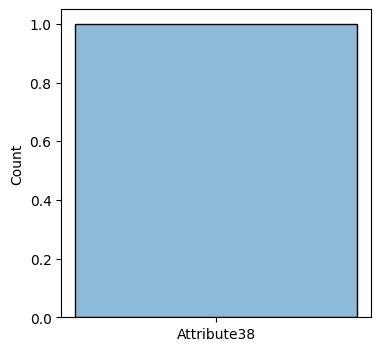

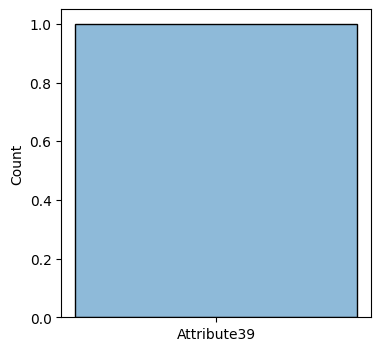

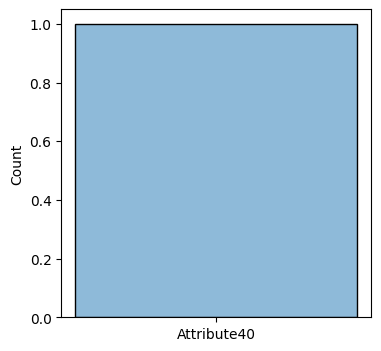

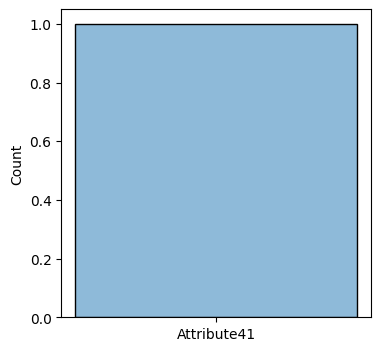

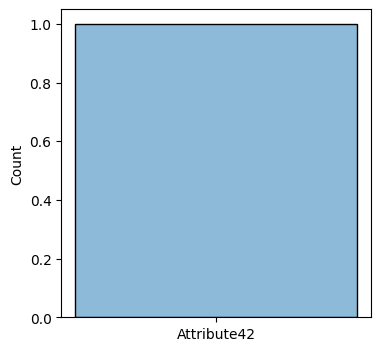

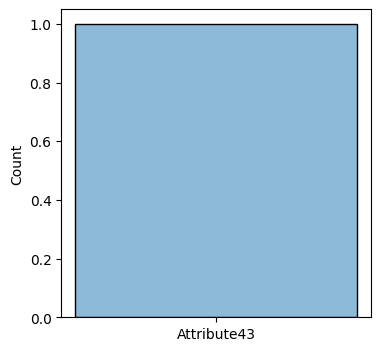

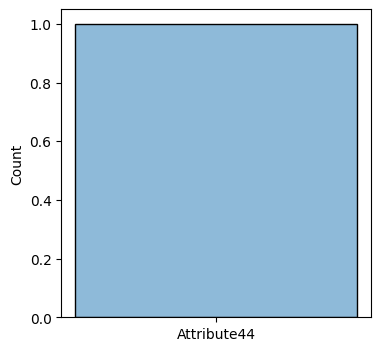

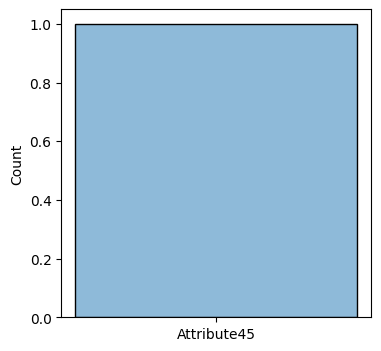

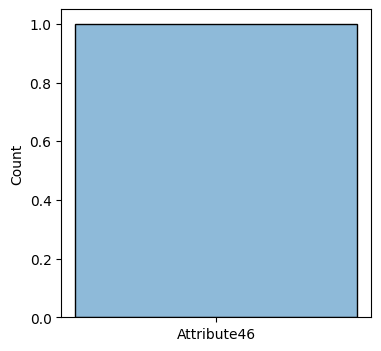

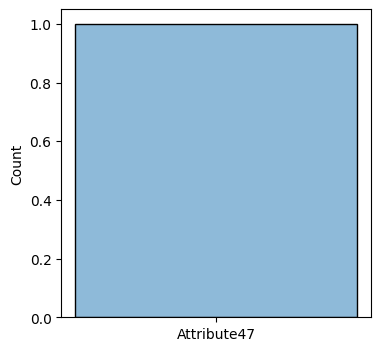

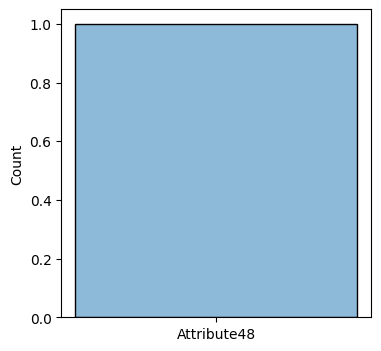

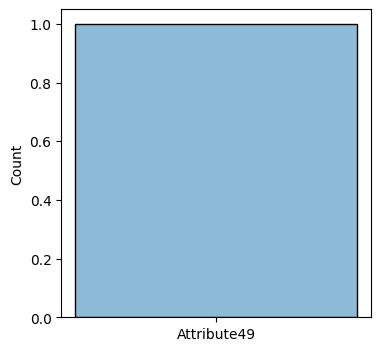

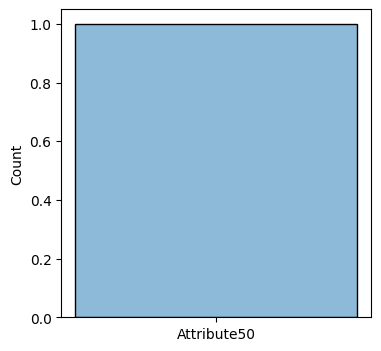

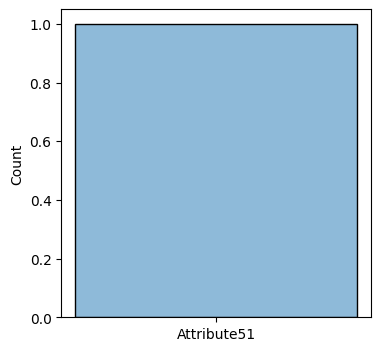

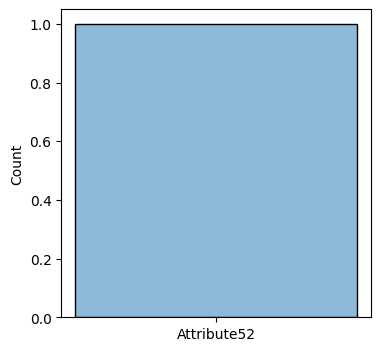

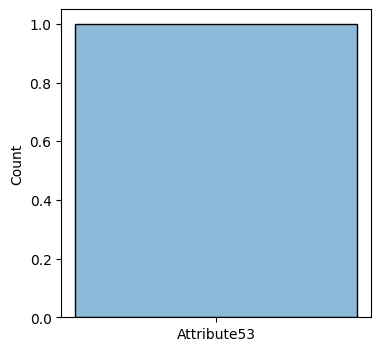

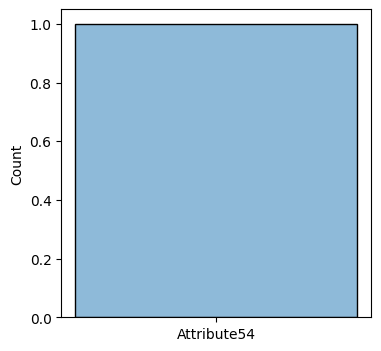

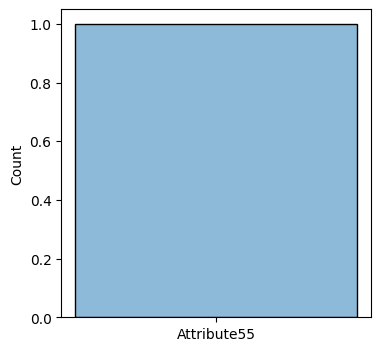

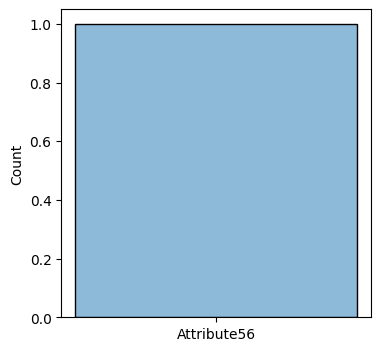

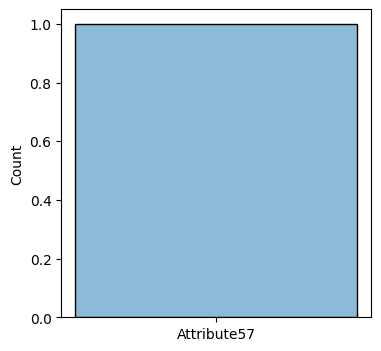

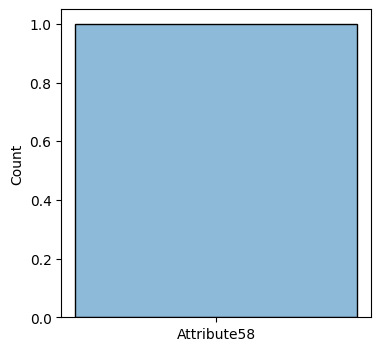

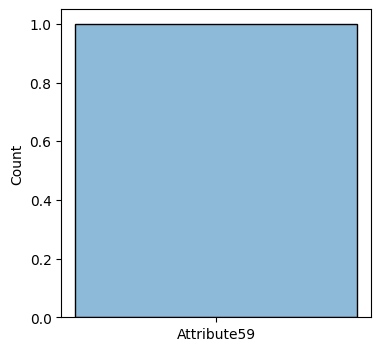

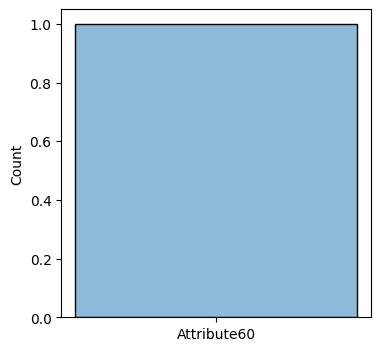

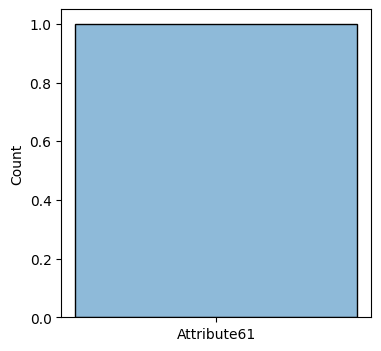

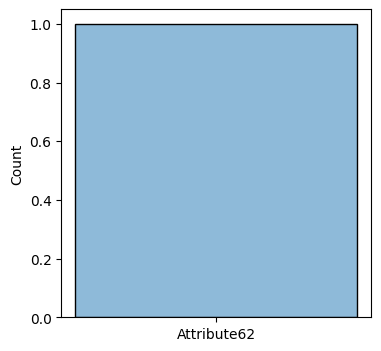

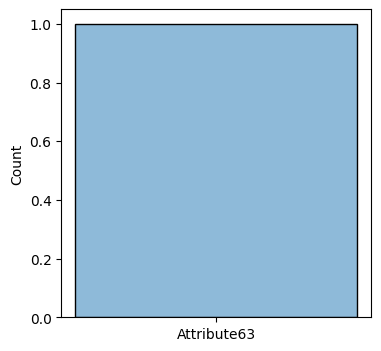

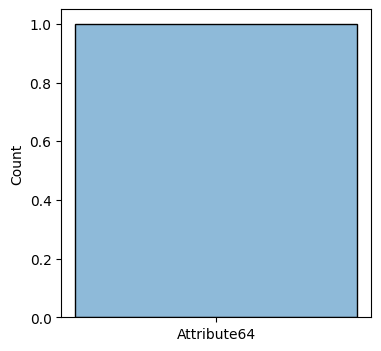

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
for i in X.columns:
  plt.figure(figsize = (4,4))
  sns.histplot(i,kde = True)

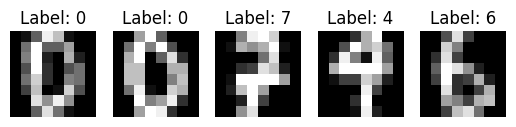

In [ ]:
import matplotlib.pyplot as plt

# Pick some samples from X and y
for i in range(5):
    plt.subplot(1, 5, i+1)  # 1 row, 5 columns
    plt.imshow(X.iloc[i].values.reshape(8, 8), cmap="gray")
    plt.title(f"Label: {y.iloc[i,0]}")
    plt.axis("off")

plt.show()

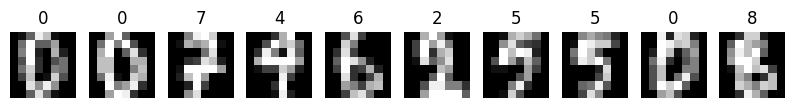

In [23]:
import matplotlib.pyplot as plt
def plot_digits(X, y, n=10):
    plt.figure(figsize=(10, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        img = X.iloc[i].values.reshape(8, 8)
        plt.imshow(img, cmap="gray")
        plt.title(str(y.iloc[i, 0]))
        plt.axis("off")
    plt.show()
plot_digits(X, y, n=10)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Xpca = pca.fit_transform(X_scaled)

In [10]:
print(X.shape)
print(Xpca.shape)

(5620, 64)
(5620, 2)


C:\Users\hp\AppData\Local\Temp\ipykernel_9784\48287391.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='coolwarm', edgecolor='k', s=80)
C:\Users\hp\AppData\Local\Temp\ipykernel_9784\48287391.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Xpca[:, 0], Xpca[:, 1], cmap='coolwarm', edgecolor='k', s=80)


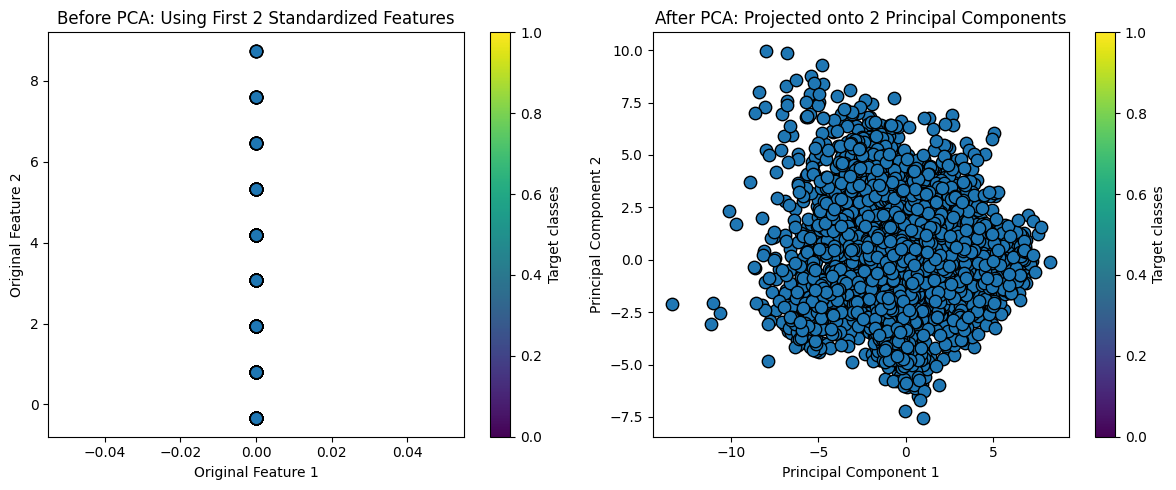

In [11]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Original Feature 1')
plt.ylabel('Original Feature 2')
plt.title('Before PCA: Using First 2 Standardized Features')
plt.colorbar(label='Target classes')

plt.subplot(1, 2, 2)
plt.scatter(Xpca[:, 0], Xpca[:, 1], cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA: Projected onto 2 Principal Components')
plt.colorbar(label='Target classes')

plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data preprocessing complete.")

Data preprocessing complete.


Accuracy (no PCA): 0.9688612099644128
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       111
           1       0.93      0.99      0.96       114
           2       0.99      0.97      0.98       111
           3       0.97      0.98      0.98       114
           4       0.97      0.97      0.97       114
           5       0.95      0.95      0.95       112
           6       1.00      0.96      0.98       112
           7       0.99      0.98      0.99       113
           8       0.95      0.94      0.95       111
           9       0.95      0.96      0.95       112

    accuracy                           0.97      1124
   macro avg       0.97      0.97      0.97      1124
weighted avg       0.97      0.97      0.97      1124



c:\linear_regression\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\linear_regression\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


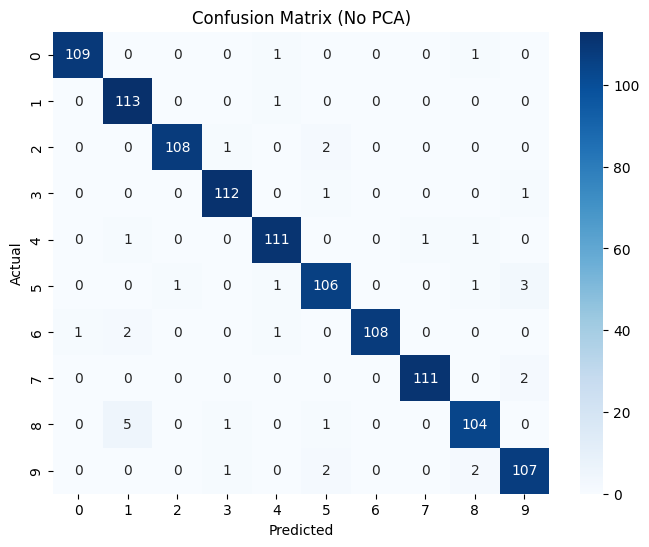

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

print("Accuracy (no PCA):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (No PCA)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

c:\linear_regression\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy (with PCA=50): 0.548932384341637
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       111
           1       0.40      0.51      0.45       114
           2       0.62      0.73      0.67       111
           3       0.45      0.51      0.48       114
           4       0.85      0.84      0.85       114
           5       0.28      0.19      0.22       112
           6       0.91      0.84      0.87       112
           7       0.72      0.77      0.74       113
           8       0.23      0.22      0.22       111
           9       0.07      0.05      0.06       112

    accuracy                           0.55      1124
   macro avg       0.53      0.55      0.54      1124
weighted avg       0.53      0.55      0.54      1124



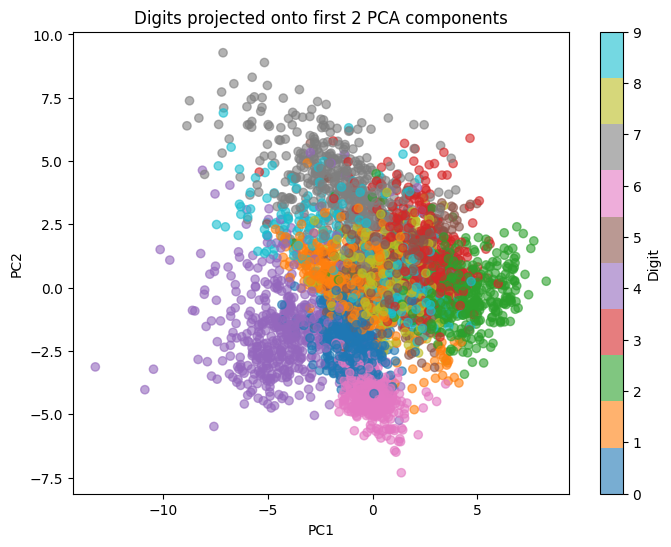

Accuracy (with PCA=50): 0.9644128113879004
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       111
           1       0.94      0.99      0.97       114
           2       0.99      0.96      0.98       111
           3       0.97      0.97      0.97       114
           4       0.97      0.97      0.97       114
           5       0.96      0.95      0.95       112
           6       0.98      0.96      0.97       112
           7       0.98      0.97      0.98       113
           8       0.94      0.95      0.94       111
           9       0.94      0.95      0.94       112

    accuracy                           0.96      1124
   macro avg       0.96      0.96      0.96      1124
weighted avg       0.96      0.96      0.96      1124



c:\linear_regression\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [22]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2)
X_trainpca2 = pca_2d.fit_transform(X_train_scaled)
X_testpca2 = pca_2d.transform(X_test_scaled)

logregpca = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
logregpca.fit(X_trainpca2, y_train.values.ravel())  
ypredpca = logregpca.predict(X_testpca2)

print("Accuracy (with PCA=50):", accuracy_score(y_test, ypredpca))
print(classification_report(y_test, ypredpca))

plt.figure(figsize=(8,6))
plt.scatter(
    X_trainpca2[:,0], 
    X_trainpca2[:,1], 
    c=y_train.values.ravel(),  
    cmap="tab10", 
    alpha=0.6
)
plt.colorbar(label="Digit")
plt.title("Digits projected onto first 2 PCA components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

pca_50 = PCA(n_components=50)
X_trainpca50 = pca_50.fit_transform(X_train_scaled)
X_testpca50 = pca_50.transform(X_test_scaled)

log_reg_pca = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
log_reg_pca.fit(X_trainpca50, y_train.values.ravel())  
y_pred_pca = log_reg_pca.predict(X_testpca50)

print("Accuracy (with PCA=50):", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))


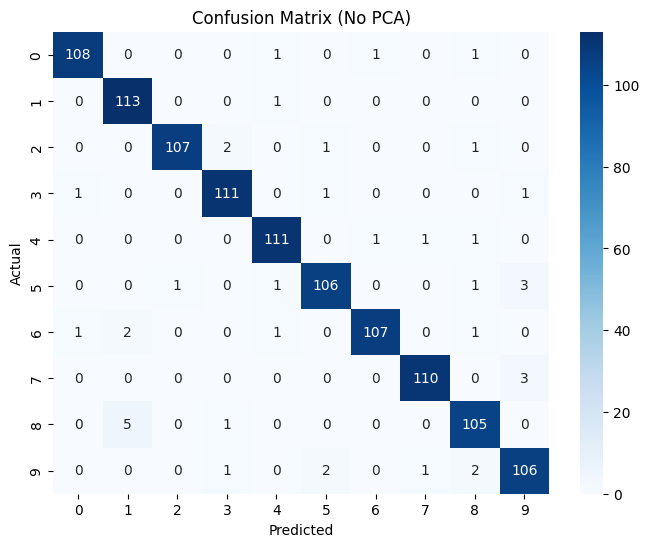

In [ ]:
cm = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (PCA)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

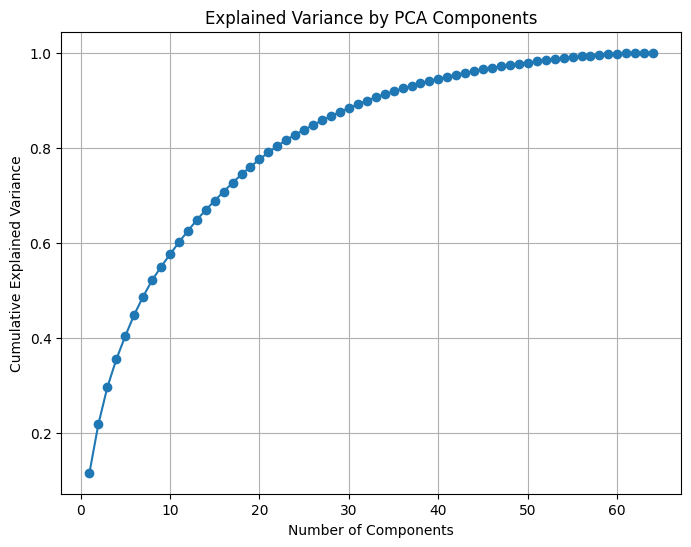

In [16]:
pca_full = PCA().fit(X_train_scaled)
plt.figure(figsize=(8,6))
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1), pca_full.explained_variance_ratio_.cumsum(), marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()